# Perform some initial analysis on the results of the SnapATAC2 pipeline
**Authorship:** Adam Klie (last updated: 08/22/2023)<br>
***
**Description:** Notebook to plot and plan next steps from a baseline SnapATAC2 run. Expects that you have run all steps up to and including `7_analyze_anndataset.sh`. This is somewhat of a playground and thus will need to be interactive.

In [1]:
import snapatac2 as snap

# Load processed and analyzed AnnDataset

In [2]:
adatas = snap.read_dataset("/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/16Aug23/snapatac2/analysis/adata_atac_merged_analysis.h5ads")
adatas

AnnDataSet object with n_obs x n_vars = 170329 x 606219 backed at '/cellar/users/aklie/data/datasets/igvf_sc-islet_10X-Multiome/annotation/16Aug23/snapatac2/analysis/adata_atac_merged_analysis.h5ads'
contains 27 AnnData objects with keys: 'DM0B', 'DM11A', 'DM12B', 'DM14B', 'DM21A', 'DM23A', 'DM24A', 'DM25A', 'DM31A', 'DM32A', 'DM33A', 'DM34A', 'DM35A', 'DM42B', 'DM43B', 'DM44A', 'DM45A', 'MO14', 'MO18', 'MO1', 'MO22', 'MO26', 'MO29', 'MO33', 'MO38', 'MO3', 'MO9'
    obs: 'sample', 'leiden'
    var: 'count', 'selected'
    uns: 'AnnDataSet', 'reference_sequences', 'spectral_eigenvalue'
    obsm: 'X_spectral', 'X_umap'
    obsp: 'distances'

# Add metadata from other places

# Batch correction

In [4]:
snap.pp.mnc_correct(adatas, batch="sample")

In [7]:
snap.tl.umap(adatas, use_rep="X_spectral_mnn")

/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/miniconda3/envs/scverse-lite-py38/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/cellar/users/aklie/opt/mi

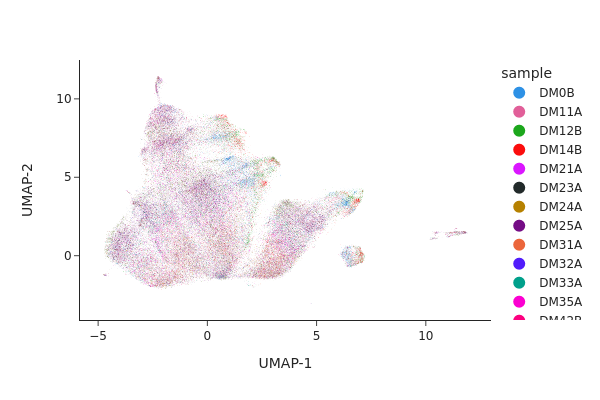

In [9]:
snap.pl.umap(adatas, color="sample", interactive=False)

In [12]:
snap.pp.harmony(adatas, batch="sample", max_iter_harmony=20)

2023-10-04 10:43:19,777 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-04 10:43:19 - INFO - Computing initial centroids with sklearn.KMeans...
2023-10-04 10:44:13,697 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-10-04 10:44:13 - INFO - sklearn.KMeans initialization complete.
2023-10-04 10:44:15,731 - harmonypy - INFO - Iteration 1 of 20
2023-10-04 10:44:15 - INFO - Iteration 1 of 20
2023-10-04 10:47:53,334 - harmonypy - INFO - Iteration 2 of 20
2023-10-04 10:47:53 - INFO - Iteration 2 of 20
2023-10-04 10:51:10,220 - harmonypy - INFO - Iteration 3 of 20
2023-10-04 10:51:10 - INFO - Iteration 3 of 20
2023-10-04 10:54:13,896 - harmonypy - INFO - Converged after 3 iterations
2023-10-04 10:54:13 - INFO - Converged after 3 iterations


In [ ]:
snap.tl.umap(adatas, use_rep="X_spectral_harmony")

In [ ]:
snap.pl.umap(adatas, color="sample", interactive=False)

In [ ]:
adatas.close()

```python
snap.pp.mnc_correct(data, batch="sample")
snap.pp.harmony(data, batch="sample", max_iter_harmony=20)
```

```python
snap.tl.umap(data, use_rep="X_spectral_mnn")
snap.pl.umap(data, color="sample", interactive=False)
```

```python
snap.tl.umap(data, use_rep="X_spectral_harmony")
snap.pl.umap(data, color="sample", interactive=False)
```

# snapatac2.pl.spectral_eigenvalues for each dim reduction

# Recluster

```python
snap.pp.knn(data, use_rep="X_spectral_harmony")
snap.tl.leiden(data)
snap.pl.umap(data, color="leiden", interactive=False)
```

# Joint embedding with RNA?

# Differential accessibility?

# Export to BED and BigWig?